In [28]:
import numpy as np
import matplotlib.pyplot as plt

name_str='uniform-distribution-frequency-65-seed-{}.npz'
sample_list = np.arange(1000,1100,10)
std_w_range = np.arange(0.001,0.4,0.06)
axis_std_w1 = np.arange(0.001, 0.3, 0.04)
axis_std_w2 = np.arange(0.001, 0.3, 0.04)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
train_accuracy_10_samples = np.zeros((10,8,8))
test_accuracy_10_samples = np.zeros((10,8,8))


In [29]:
test1 = np.load('uniform-distribution-frequency-65-seed-1.npz')
print(test1['loss_hist'])

[3.2452805  2.12668919 1.70881901 1.18319708 1.02636096]


0.9313902243589743
0.9287860576923077
0.9352964743589743
0.928886217948718
0.9205729166666666
0.938301282051282
0.9341947115384616
0.9267828525641025
0.9273838141025641
0.9262820512820513


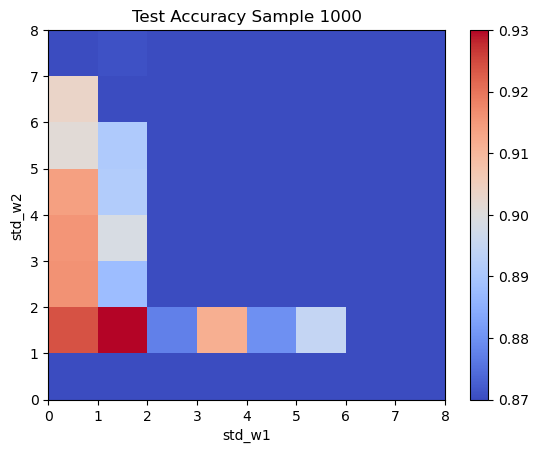

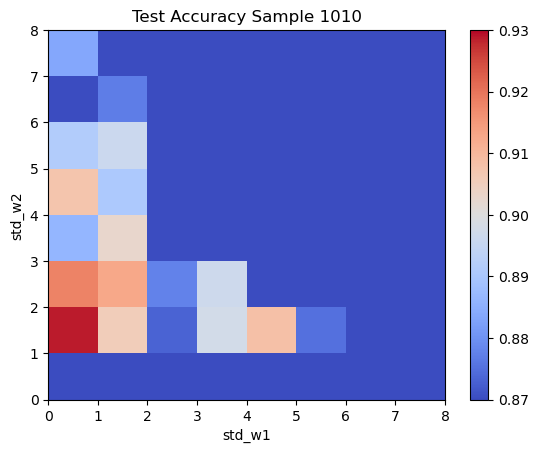

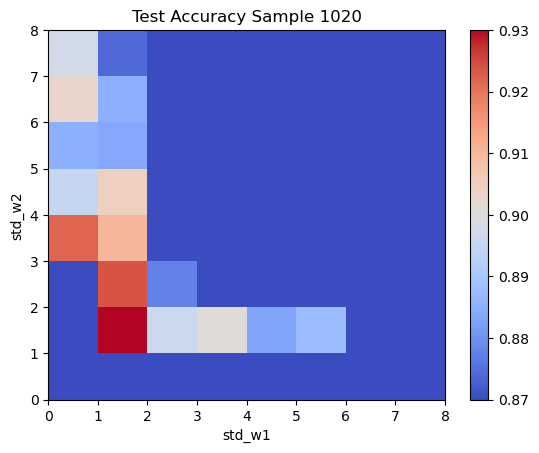

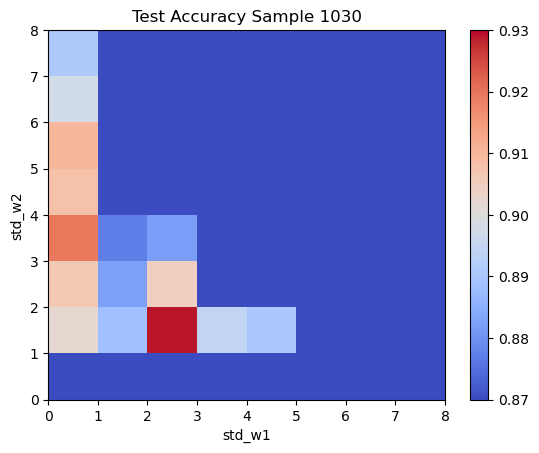

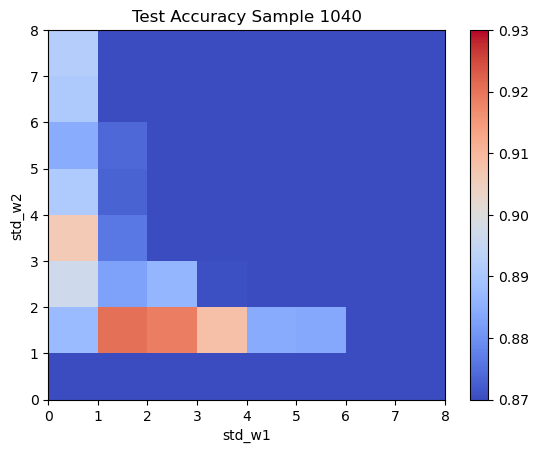

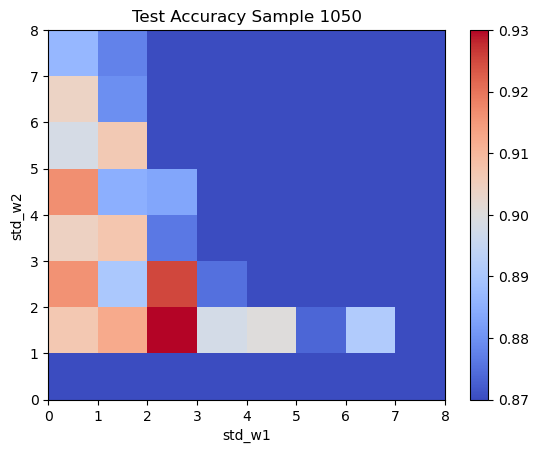

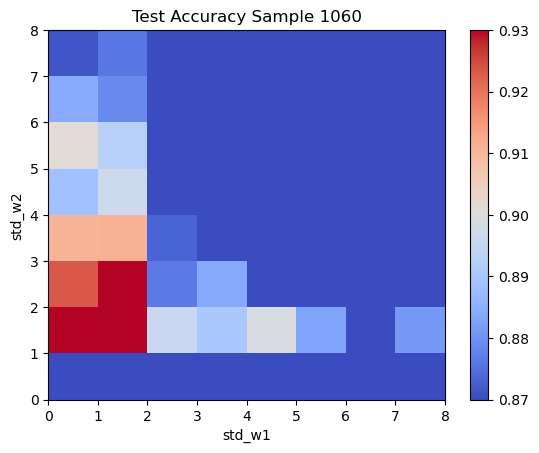

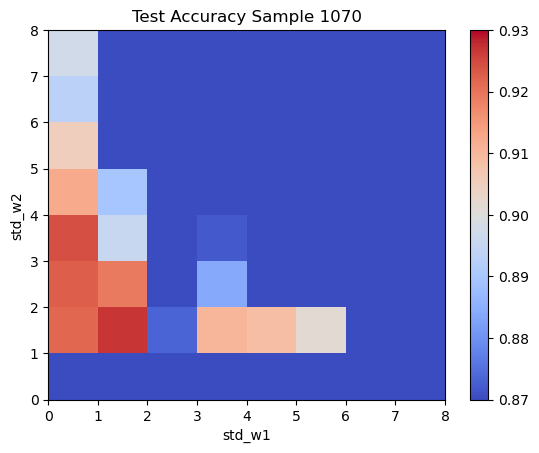

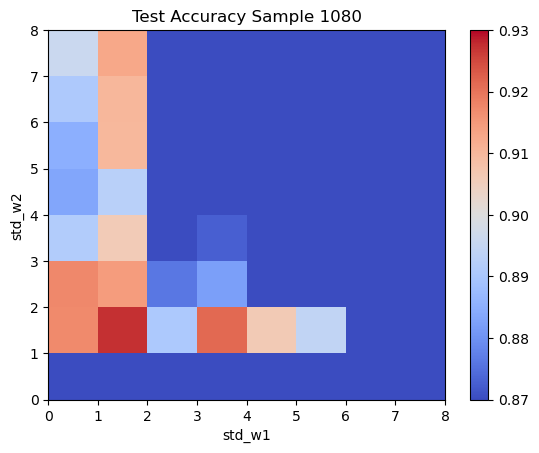

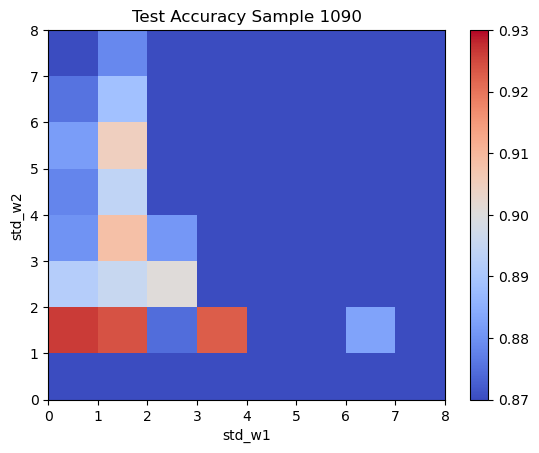

In [30]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(i))
    fig = plt.figure()
    ax = plt.axes()
    levels = np.linspace(0.87, 0.94, 10)
    b = ax.pcolormesh(data['test_accuracy_w1_w2'], cmap ='coolwarm', vmin=0.87, vmax=0.93)
    plt.colorbar(b)
    ax.set_xlabel('std_w1')
    ax.set_ylabel('std_w2')
    ax.set_title('Test Accuracy Sample {}'.format(sample))
    fig.savefig("test_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            test_accuracy_10_samples[i][j][k]= data['test_accuracy_w1_w2'][j][k]
    max_accuracy = np.max(test_accuracy_10_samples[i])
    index_max_accuracy = np.argmax(test_accuracy_10_samples[i])
    test_best_w1_w2 = np.unravel_index(index_max_accuracy, test_accuracy_10_samples[i].shape)
    test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.015+0.005
    print(max_accuracy)



In [31]:
average_train_accuracy_grid_10_by_10_10_samples = np.mean(train_accuracy_10_samples, axis=0)
std_dev_train_accuracy_grid_10_by_10_10_samples = np.std(train_accuracy_10_samples, axis=0)

In [32]:
average_test_accuracy_grid_10_by_10_10_samples = np.mean(test_accuracy_10_samples, axis=0)
std_dev_test_accuracy_grid_10_by_10_10_samples = np.std(test_accuracy_10_samples, axis=0)

In [33]:
average_test_accuracy_grid_10_by_10_10_samples

array([[0.07421875, 0.07421875, 0.07421875, 0.07421875, 0.07421875,
        0.07421875, 0.07421875, 0.07421875],
       [0.90772236, 0.92042268, 0.89671474, 0.90548878, 0.89149639,
        0.88294271, 0.85833333, 0.85434696],
       [0.9036859 , 0.90428686, 0.88530649, 0.87380809, 0.84402043,
        0.83184095, 0.79047476, 0.79063502],
       [0.90606971, 0.89930889, 0.86596554, 0.84940905, 0.81084736,
        0.78877204, 0.75481771, 0.75423678],
       [0.8994391 , 0.88857171, 0.84764623, 0.82692308, 0.79517228,
        0.7701222 , 0.73557692, 0.73336338],
       [0.89434095, 0.88920272, 0.83366386, 0.81308093, 0.77864583,
        0.75512821, 0.72444912, 0.71549479],
       [0.88339343, 0.87647236, 0.81821915, 0.80240385, 0.76073718,
        0.73187099, 0.69082532, 0.68652845],
       [0.87829527, 0.8716246 , 0.81187901, 0.79791667, 0.75358574,
        0.72467949, 0.6859976 , 0.66523437]])

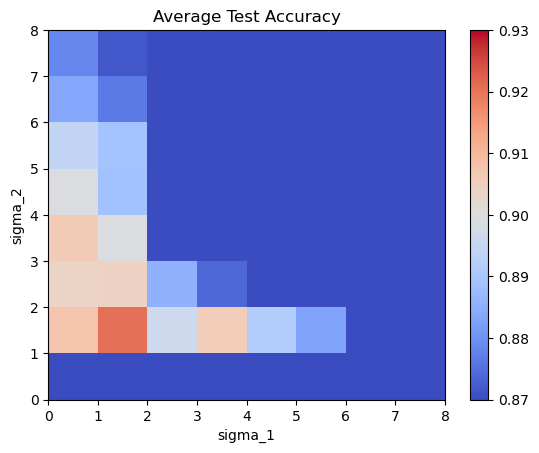

In [34]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(average_test_accuracy_grid_10_by_10_10_samples, cmap ='coolwarm', vmin= 0.87, vmax=0.93)
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_test_accuracy_grid_300_0.1.png".format(sample))

In [35]:
average_test_accuracy_grid_10_by_10_10_samples >= 0.95*np.max(average_test_accuracy_grid_10_by_10_10_samples)

array([[False, False, False, False, False, False, False, False],
       [ True,  True,  True,  True,  True,  True, False, False],
       [ True,  True,  True, False, False, False, False, False],
       [ True,  True, False, False, False, False, False, False],
       [ True,  True, False, False, False, False, False, False],
       [ True,  True, False, False, False, False, False, False],
       [ True,  True, False, False, False, False, False, False],
       [ True, False, False, False, False, False, False, False]])

In [36]:
test1 = average_test_accuracy_grid_10_by_10_10_samples >= 0.95*np.max(average_test_accuracy_grid_10_by_10_10_samples)

test2 = np.sort(np.extract(test1, average_test_accuracy_grid_10_by_10_10_samples))

test3 = np.argwhere(average_test_accuracy_grid_10_by_10_10_samples> 0.8994391)

print(test2)


[0.87647236 0.87829527 0.88294271 0.88339343 0.88530649 0.88857171
 0.88920272 0.89149639 0.89434095 0.89671474 0.89930889 0.8994391
 0.9036859  0.90428686 0.90548878 0.90606971 0.90772236 0.92042268]


In [37]:
array = []
for t1 in test3:
    tbw1_w2= (np.array(t1)+np.array([0.5,0.5]))*0.015+0.005
    array.append(tbw1_w2)

In [38]:
i=0
for element in array:
    data = {}
    data['frequency'] = 65
    data['N'] = 300
    data['w1'] = element[0]/0.3445
    data['w2'] = element[1]/0.3445
    np.savez("test_accuracy_300_seed_{}.npz".format(i),**data)
    i+=1

In [39]:
data = {}
data['frequency'] = 65
data['N'] = 300
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.0075/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.0075/0.3445
np.savez("test_accuracy_300",**data)